In [ ]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
backorddf_1 = pd.read_csv('Kaggle_Training_Dataset_v2.csv')
backorddf_2 = pd.read_csv('Kaggle_Test_Dataset_v2.csv')

backorddf = pd.concat([backorddf_1, backorddf_2])

###### Feature Descriptions:

  - Sku(Stock Keeping unit) : The product id — Unique for each row so can be ignored
  - National_inv : The present inventory level of the product
  - Lead_time : Transit time of the product
  - In_transit_qty : The amount of product in transit
  - Forecast_3_month , Forecast_6_month , Forecast_9_month : Forecast of the sales of the product for coming 3 , 6 and 9 months respectively
  - Sales_1_month , sales_3_month ,sales_6_month , sales_9_month : Actual sales of the product in last 1 , 3 ,6 and 9 months respectively
  - Min_bank : Minimum amount of stock recommended
  - Potential_issue : Any problem identified in the product/part
  - Pieces_past_due: Amount of parts of the product overdue if any
  - Perf_6_month_avg , perf_12_month_avg : Product performance over past 6 and 12 months respectively
  - Local_bo_qty : Amount of stock overdue
  - Deck_risk , oe_constraint, ppap_risk, stop_auto_buy, rev_stop : Different Flags (Yes or No) set for the product
  - Went_on_backorder : Target variable


In [ ]:
backorddf.shape

(1929937, 23)

In [ ]:
backorddf.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.929935e+06,1.814318e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06
mean,4.965683e+02,7.878627e+00,4.306440e+01,1.785399e+02,3.454659e+02,5.066067e+02,5.536816e+01,1.746639e+02,3.415653e+02,5.235771e+02,5.277637e+01,2.016193e+00,-6.899870e+00,-6.462343e+00,6.537039e-01
std,2.957343e+04,7.054212e+00,1.295420e+03,5.108770e+03,9.831562e+03,1.434543e+04,1.884377e+03,5.188856e+03,9.585030e+03,1.473327e+04,1.257968e+03,2.296112e+02,2.659988e+01,2.588343e+01,3.543230e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.600000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.510592e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


Observation

1. The most of the feature mean value is greater than the 75 percentile so it is extreamly postive skewed

2. Most of the features max value is greater than the 75% so they have outliers

3. The features perf_6_month_avg and perf_12_month_avg has max value 1 and min value -99 so most of the missing value is replace with -99.

In [ ]:
# Checking the Null Value Columns

def NullValsCols(df):
  return df.columns[df.isnull().any()].to_list()

NullValsCols(backorddf)

['national_inv',
 'lead_time',
 'in_transit_qty',
 'forecast_3_month',
 'forecast_6_month',
 'forecast_9_month',
 'sales_1_month',
 'sales_3_month',
 'sales_6_month',
 'sales_9_month',
 'min_bank',
 'potential_issue',
 'pieces_past_due',
 'perf_6_month_avg',
 'perf_12_month_avg',
 'local_bo_qty',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop',
 'went_on_backorder']

Observations

  1. Out of 23 Features 22 feature having Misssing values

In [ ]:
# Finding Missing Value tota with Percentage

def MissingValsPercent(df):
  missing_col = NullValsCols(df)
  total_mising_vals = df[missing_col].isnull().sum().sort_values(ascending=False)
  tota_missing_perc = ((df[missing_col].isnull().sum() / df[missing_col].isnull().count()) * 100 ).sort_values(ascending=False)
  return pd.concat([total_mising_vals, tota_missing_perc], axis=1, keys=['Total', 'Percentage(%)'])

MissingValsPercent(backorddf)

,Total,Percentage(%)
lead_time,115619,5.990817
went_on_backorder,2,0.000104
rev_stop,2,0.000104
in_transit_qty,2,0.000104
forecast_3_month,2,0.000104
forecast_6_month,2,0.000104
forecast_9_month,2,0.000104
sales_1_month,2,0.000104
sales_3_month,2,0.000104
sales_6_month,2,0.000104


Observation

1. Out of 22 Missing features there is lead_time feaure only having 6% of missing value from overall dataset remaining fetures having only 2 missing record.

In [ ]:
# Filter the numerical feature columns

numerical_feat = backorddf.columns[backorddf.dtypes != 'object'].to_list()
categorical_feat = backorddf.columns[backorddf.dtypes == 'object'].to_list()
print("Numerical Features:===========>", numerical_feat)
print("Categorical Features:===========>", categorical_feat)

Numerical Features:===========> ['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'forecast_6_month', 'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank', 'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg', 'local_bo_qty']
Categorical Features:===========> ['sku', 'potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']


In [ ]:
# Finding the Nul value Index for drop 

for x in NullValsCols(backorddf):
  if x != 'lead_time':
    print(x,"============>",backorddf[backorddf[x].isnull()].index)

national_inv ============> Int64Index([1687860, 242075], dtype='int64')
in_transit_qty ============> Int64Index([1687860, 242075], dtype='int64')
forecast_3_month ============> Int64Index([1687860, 242075], dtype='int64')
forecast_6_month ============> Int64Index([1687860, 242075], dtype='int64')
forecast_9_month ============> Int64Index([1687860, 242075], dtype='int64')
sales_1_month ============> Int64Index([1687860, 242075], dtype='int64')
sales_3_month ============> Int64Index([1687860, 242075], dtype='int64')
sales_6_month ============> Int64Index([1687860, 242075], dtype='int64')
sales_9_month ============> Int64Index([1687860, 242075], dtype='int64')
min_bank ============> Int64Index([1687860, 242075], dtype='int64')
potential_issue ============> Int64Index([1687860, 242075], dtype='int64')
pieces_past_due ============> Int64Index([1687860, 242075], dtype='int64')
perf_6_month_avg ============> Int64Index([1687860, 242075], dtype='int64')
perf_12_month_avg ============> Int64Ind

Observation

1. So that 1 Missing value over 22 feature index is last row. so we can drop that last row [1687860]

In [ ]:
backorddf.drop(backorddf.index[[1687860, 242075]], inplace=True)

In [ ]:
backorddf.shape

(1929934, 23)

In [ ]:
MissingValsPercent(backorddf)

,Total,Percentage(%)
lead_time,115616,5.990671


In [ ]:
backorddf['lead_time'] = backorddf.lead_time.fillna(backorddf.lead_time.median())

Here the lead_time feature having high outlier skewed distribution. so we can use the Midian imputation for missing value

In [ ]:
MissingValsPercent(backorddf)

,Total,Percentage(%)


Now there is no Missing Data in Dataset

In [ ]:
# Drop sku because we dont need unique identifier

backorddf.drop('sku', axis=1, inplace=True)

In [ ]:
# Handling the categorical Features

for x in [x for x in categorical_feat if x != 'sku']:
  print(x,"================>",backorddf[x].unique())

potential_issue ================> ['No' 'Yes']
deck_risk ================> ['No' 'Yes']
oe_constraint ================> ['No' 'Yes']
ppap_risk ================> ['No' 'Yes']
stop_auto_buy ================> ['Yes' 'No']
rev_stop ================> ['No' 'Yes']
went_on_backorder ================> ['No' 'Yes']


Obeservations

1. So the categorical features having only 2 category ['Yes', 'No']

In [ ]:
# Feature Engineering

for x in categorical_feat:
  if x != 'sku':
    backorddf[x].replace({'Yes': 1, 'No': 0}, inplace=True)
    backorddf[x].astype(int)

So now we encoded the categories like 'Yes' is 1 and 'No' is 0

In [ ]:
# Checking the Imabalanced Data

backorddf.went_on_backorder.value_counts()

0    1915953
1      13981
Name: went_on_backorder, dtype: int64

Observation 

1. So above data this dataset is highly imbalanced

In [ ]:
# Imbalanced Data Handling 
# we have to undersample the data


from imblearn.under_sampling import NearMiss

# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss()#NearMiss do not take random_state arguement 
X,y = nm.fit_sample(backorddf[[x for x in backorddf.columns.to_list() if x != 'went_on_backorder']],backorddf['went_on_backorder'])

We are undersampled the dataset for balancing the Dataset

In [ ]:
# Combine X,y to Dataframe for further processing

import numpy as np

def ConvertToDf(X,y, x_cols=[], y_cols=''):
  dfs = pd.DataFrame(data = X, columns = x_cols)
  dfs_1 = pd.DataFrame(data=y, columns=[y_cols])
  return pd.concat([dfs, dfs_1], axis=1)

x_cols = [x for x in backorddf.columns.to_list() if x != 'went_on_backorder']
y_cols = 'went_on_backorder'

newBackordDf = ConvertToDf(X, y, x_cols, y_cols)

In [ ]:
newBackordDf.shape

(27962, 22)

In [ ]:
newBackordDf.went_on_backorder.value_counts()

1    13981
0    13981
Name: went_on_backorder, dtype: int64

So now We got the Balanced dataset

In [ ]:
# Save the Preprocessed dataset

newBackordDf.to_csv('preprocessed.csv')

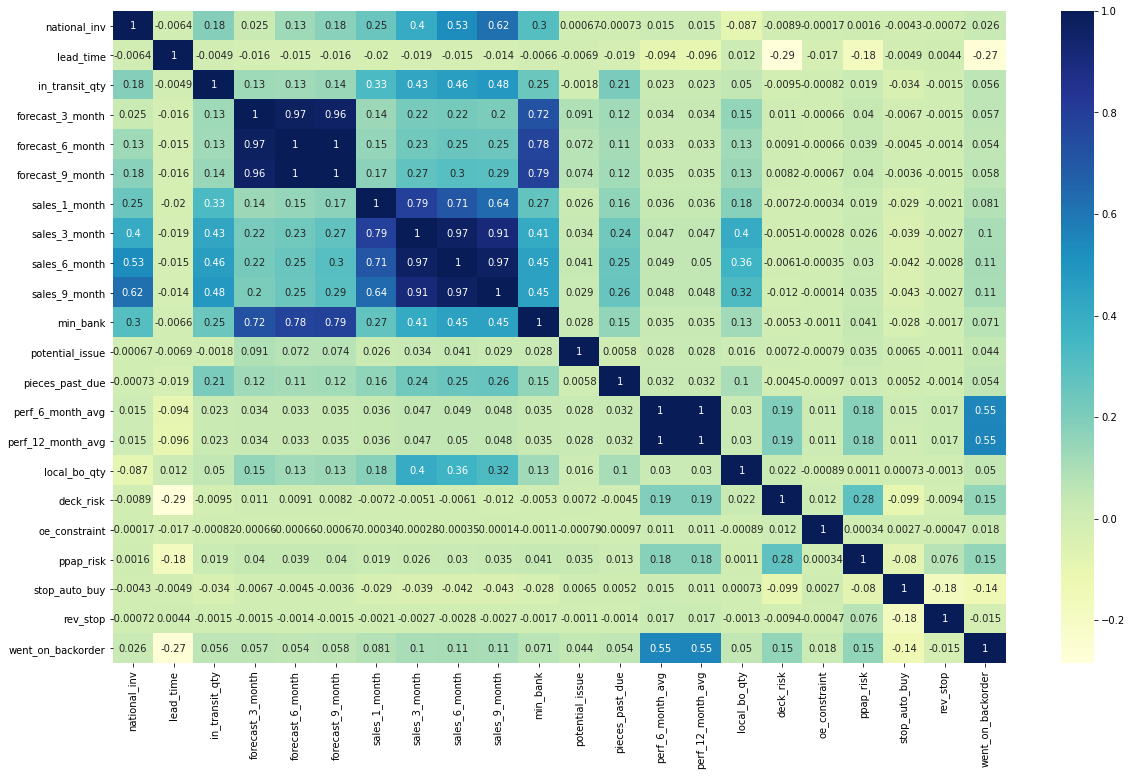

In [ ]:
# Check the Correlation

plt.figure(figsize=(20,12))
sns.heatmap(newBackordDf.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [ ]:
# Checking the Correlation between Independant features

def PearsonCorrelation(data=None, thersold=0.5):
  cor_col = set()
  corr_matrix = data.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > thersold:
        cor_col.add(corr_matrix.columns[i])
  return cor_col

In [ ]:
PearsonCorrelation(newBackordDf, 0.25)

{'deck_risk',
 'forecast_6_month',
 'forecast_9_month',
 'local_bo_qty',
 'min_bank',
 'perf_12_month_avg',
 'pieces_past_due',
 'ppap_risk',
 'sales_1_month',
 'sales_3_month',
 'sales_6_month',
 'sales_9_month',
 'went_on_backorder'}

Obeservations

1. I am selecting a correlation thersold is 0.25 above and selecting those above thersold correlation features

In [ ]:
# Checking The Information Gain for the features

"""
IG calculates the importance of each feature by measuring the increase in entropy when the feature is given vs. absent.

Algorithm: IG(S, a) = H(S) — H(S | a) Where IG(S, a) is the information for the dataset S for the variable a for a random variable, 
H(S) is the entropy for the dataset before any change (described above) and H(S | a) is the conditional entropy for the dataset in 
the presence of variable a.
"""

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

def FeatureInfoGain(X, y, score, no_need_feat):
  bestfeatures = SelectKBest(score_func=mutual_info_classif, k=no_need_feat) # n is number of features you want to select
  fit = bestfeatures.fit(X,y)
  dfscores = pd.DataFrame(fit.scores_)
  dfcolumns = pd.DataFrame(X.columns)
  featureScores = pd.concat([dfcolumns,dfscores],axis=1)
  featureScores.columns = ['Specs','Score']
  return featureScores[featureScores.Score > score]

X = newBackordDf[[x for x in newBackordDf.columns.to_list() if x != 'went_on_backorder']]
y = newBackordDf['went_on_backorder']

FeatureInfoGain(X, y, 0.2, 6)

,Specs,Score
0,national_inv,0.235911
3,forecast_3_month,0.387754
4,forecast_6_month,0.420863
5,forecast_9_month,0.435650
6,sales_1_month,0.361213
7,sales_3_month,0.446555
8,sales_6_month,0.472152
9,sales_9_month,0.479556
13,perf_6_month_avg,0.393250
14,perf_12_month_avg,0.415694


1. If we use the Tree based Classification Algo we can use this technique to get the bset features based on the score.

In [ ]:
''' Seleting the features'''

predictors = ['forecast_6_month', 'forecast_9_month','sales_3_month', 'national_inv','sales_6_month',
              'sales_9_month', 'perf_6_month_avg','perf_12_month_avg', 'forecast_3_month']
target_c = 'went_on_backorder'

As per Infogain and Correlation. i have selected 9 predictors

In [ ]:
def OutlierRatio(df):
  q1 = df.quantile(0.25)
  q3 = df.quantile(0.75)
  IQR = q3 - q1
  total_outliers = ((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))).sum().sort_values(ascending=False)
  total_outl_per = ((total_outliers/ ((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))).count()) * 100).sort_values(ascending=False)
  return pd.concat([total_outliers, total_outl_per], axis=1, keys=['Outliers Total', 'Percentage(%)'])

OutlierRatio(newBackordDf[predictors]).head(17)

,Outliers Total,Percentage(%)
forecast_6_month,4326,15.470996
forecast_9_month,4313,15.424505
national_inv,4295,15.360132
sales_9_month,4242,15.170589
forecast_3_month,4106,14.684214
sales_6_month,4065,14.537587
sales_3_month,4019,14.373078
perf_12_month_avg,0,0.000000
perf_6_month_avg,0,0.000000


We need to scaling the Outlier datas .so we can apply the Robust Scalar

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

X_train,x_test,Y_train,y_test = train_test_split(newBackordDf[predictors], newBackordDf[target_c], test_size=0.3, random_state=7)

transformer = RobustScaler().fit(X_train)
X_train = transformer.transform(X_train)
x_test = transformer.transform(x_test)

In Robust scaling every values is scaled as below.

1. Values = (value — median)/(75th percentile value — 25th percentile value)
This approach standardizes the data with out considering outliers while scaling the data.


In [ ]:
try:
  from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score
  from sklearn.model_selection import cross_validate 
  from sklearn.linear_model import LogisticRegression
  from sklearn.svm import LinearSVC
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.naive_bayes import GaussianNB
  from xgboost import XGBClassifier
except Exception as e:
  raise str(e)

class EvalModel:
  def __init__(self, x=None, y=None, fold=5):
    self._x = x
    self._y = y
    self._fold = fold 
    self._clstree = {'logreg': LogisticRegression, 'svm': LinearSVC,
                     'dsctree': DecisionTreeClassifier, 'rndfclf': RandomForestClassifier, 
                     'adabst': AdaBoostClassifier, 'nvbys': GaussianNB,
                     'knn': KNeighborsClassifier, 'xgbst': XGBClassifier}
    self._scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

  @staticmethod
  def _has_classifier():
    return ['logreg', 'svm', 'dsctree', 'rndfclf', 'nvbys', 'adabst', 'knn', 'xgbst']

  def _has_classifier_names(self, name):
    return {
        'logreg': 'Logistic Regression',
        'svm': 'Support Vector Classifier',
        'dsctree': 'Decision Tree',
        'rndfclf':'Random Forest',
        'nvbys':'Gaussian Naive Bayes',
        'adabst': 'AdaBoost Classifier',
        'knn': 'KNearest Classifier',
        'xgbst': 'XGBoost Classifier'
    }.get(name)

  def _perform_validate(self,nmdl=[]):
    models_scores_table = {}
    try:
      for x in nmdl:
        if x not in self._has_classifier():
          return "{x} - key of Classifier Not Available. so please execute _has_classifier_names() method to see available classifiers".format(x=x)
        validated_obj = self._cross_validate(self._clstree.get(x)())
        models_scores_table.update({
            self._has_classifier_names(x) : [
                                            validated_obj['test_accuracy'].mean(),
                                            validated_obj['test_precision'].mean(),
                                            validated_obj['test_recall'].mean(),
                                            validated_obj['test_f1_score'].mean()                
                                    ]
        })
      models_scores_table = pd.DataFrame(models_scores_table, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

      #Add 'Best Score' column
      models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
      # Return models performance metrics scores data frame
      return models_scores_table
    except Exception as e:
      raise str(e)

  def _cross_validate(self, model):
    return cross_validate(model, self._x, self._y, scoring=self._scoring, cv=self._fold)

In [ ]:
EvalModel._has_classifier()

['logreg', 'svm', 'dsctree', 'rndfclf', 'nvbys', 'adabst', 'knn', 'xgbst']

Available Models for checking what is the best model

If you want select Model just pass their releated keys as a list to _perform_validate(['knn']) method

{
        'logreg': 'Logistic Regression',
        'svm': 'Support Vector Classifier',
        'dsctree': 'Decision Tree',
        'rndfclf':'Random Forest',
        'nvbys':'Gaussian Naive Bayes',
        'adabst': 'AdaBoost Classifier',
        'knn': 'KNearest Classifier',
        'xgbst': 'XGBoost Classifier'
    }

In [ ]:
EvalModel(X_train, Y_train, 10)._perform_validate(['logreg', 'xgbst', 'svm', 'rndfclf', 'knn', 'nvbys'])

,Logistic Regression,XGBoost Classifier,Support Vector Classifier,Random Forest,KNearest Classifier,Gaussian Naive Bayes,Best Score
Accuracy,0.941960,0.972819,0.945435,0.983600,0.978644,0.935421,Random Forest
Precision,0.989575,0.985004,0.991883,0.994982,0.992221,0.983982,Random Forest
Recall,0.893252,0.960225,0.898160,0.972086,0.964826,0.885174,Random Forest
F1 Score,0.938937,0.972445,0.942686,0.983391,0.978320,0.931943,Random Forest


Observations

1. As per i am selected Logesstic Regression, XGBoost, SVM, Randomforest, Knearesr, Naivebayes for Model Selection the Randomforest is better than other remaining.

In [ ]:

## Hyper Parameter Optimization

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10,1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}


## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from xgboost import XGBClassifier

rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=10,cv=2,verbose=2,
                               random_state=100,n_jobs=20)
### fit the randomized model
rf_randomcv.fit(X_train,Y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:   30.2s remaining:  2.9min
[Parallel(n_jobs=20)]: Done  14 out of  20 | elapsed:  2.1min remaining:   53.9s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:  2.2min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_randomcv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=120, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rdf_clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=120, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=3, warm_start=False)

rdf_clf.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 600
building tree 2 of 600
building tree 3 of 600
building tree 4 of 600
building tree 5 of 600
building tree 6 of 600
building tree 7 of 600
building tree 8 of 600
building tree 9 of 600
building tree 10 of 600
building tree 11 of 600
building tree 12 of 600
building tree 13 of 600
building tree 14 of 600
building tree 15 of 600
building tree 16 of 600
building tree 17 of 600
building tree 18 of 600
building tree 19 of 600
building tree 20 of 600
building tree 21 of 600
building tree 22 of 600
building tree 23 of 600
building tree 24 of 600
building tree 25 of 600
building tree 26 of 600
building tree 27 of 600
building tree 28 of 600
building tree 29 of 600
building tree 30 of 600
building tree 31 of 600
building tree 32 of 600
building tree 33 of 600
building tree 34 of 600
building tree 35 of 600
building tree 36 of 600
building tree 37 of 600
building tree 38 of 600
building tree 39 of 600
building tree 40 of 600
building tree 41 of 600
building tree 42 of 600
b

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    6.1s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=120, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=3, warm_start=False)

In [ ]:
y_pred = rdf_clf.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.5s finished


Confusion matrix

 [[4157   31]
 [ 128 4073]]

True Positives(TP) =  4157

True Negatives(TN) =  4073

False Positives(FP){type 1 error} =  31

False Negatives(FN){type 2 error} =  128



classification report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4188
           1       0.99      0.97      0.98      4201

    accuracy                           0.98      8389
   macro avg       0.98      0.98      0.98      8389
weighted avg       0.98      0.98      0.98      8389




Classification accuracy : 0.9810



Classification error : 0.0190



Precision : 0.9926



Recall or Sensitivity : 0.9701



True Positive Rate : 0.9701



False Positive Rate : 0.0076





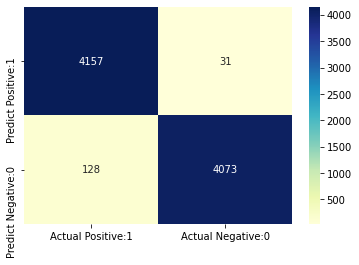

In [ ]:
# print confusion-matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP){type 1 error} = ', cm[0,1])

print('\nFalse Negatives(FN){type 2 error} = ', cm[1,0])
print('\n\n')

#-------------------------------visualization of confusion matrix -----------------------------------------------------------

# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

#----------------------------------classification report ----------------------------------------------------------------------
print('classification report')
print(classification_report(y_test, y_pred))
print('\n\n')
#-----------------------------------classification accuracy -------------------------------------------------------------------
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
print('\n\n')

#----------------------------------------classification error------------------------------------------------------------------

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))
print('\n\n')

#----------------------------------------precision-----------------------------------------------------------------------------

precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))
print('\n\n')


#--------------------------------------------Recall---------------------------------------------------------------------------
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))
print('\n\n')
#--------------------------------------Truepositive rate------------------------------------------------------------------------

true_positive_rate = TP / float(TP + FN)

print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
print('\n\n')

#--------------------------------------false positive rate---------------------------------------------------------------------
false_positive_rate = FP / float(FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
print('\n\n')

In [ ]:
import pickle

#saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(rdf_clf, open(filename, 'wb'))

In [ ]:
#saving the scalar to the local file system
filename = 'finalized_scalar.pickle'
pickle.dump(transformer, open(filename, 'wb'))

In [ ]:
newBackordDf[predictors]

,forecast_6_month,forecast_9_month,sales_3_month,national_inv,sales_6_month,sales_9_month,perf_6_month_avg,perf_12_month_avg,forecast_3_month
0,0.0,0.0,0.0,0.0,0.0,0.0,-99.00,-99.00,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,-99.00,-99.00,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,-99.00,-99.00,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,-99.00,-99.00,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,-99.00,-99.00,0.0
...,...,...,...,...,...,...,...,...,...
27957,16.0,32.0,10.0,1.0,23.0,33.0,0.83,0.85,8.0
27958,0.0,0.0,0.0,1.0,0.0,1.0,0.73,0.79,0.0
27959,6.0,8.0,6.0,1.0,13.0,13.0,0.73,0.70,4.0
27960,90.0,90.0,0.0,0.0,0.0,0.0,0.84,0.55,72.0


In [ ]:
loaded_scalar = pickle.load(open('finalized_scalar.pickle', 'rb'))
loaded_model = pickle.load(open('finalized_model.pickle', 'rb'))

In [ ]:
tranfm_f = loaded_scalar.transform([[16.0,32.0,	10.0,	1.0,	23.0,	33.0,	0.83,	0.85,	8.0]])

In [ ]:
loaded_model.predict(tranfm_f)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.1s finished


array([1])

In [ ]:
newBackordDf[target_c]

0        0
1        0
2        0
3        0
4        0
        ..
27957    1
27958    1
27959    1
27960    1
27961    1
Name: went_on_backorder, Length: 27962, dtype: int64